In [1]:
# Merge DataFrames in Pandas
# pd.merge(df1,df2, on=index or column name, how='inner'/'outer'/'left'/'right')
# ref: pandas.DataFrame.merge

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#load dataset
df = pd.read_csv(r"C:\Users\Admin\OneDrive\Desktop\Data Analysis And Automation\Sample Data\data_jobs.csv")
df.head()

# cleaning the dataset
df['job_posted_date'] = pd.to_datetime(df.job_posted_date)

In [3]:
# use df created in previous exercise

In [4]:
df_us = df[df['job_location']=='United States'].copy()
df_us['job_posted_month'] = df_us['job_posted_date'].dt.strftime('%B')
df_us_pivot = df_us.pivot_table(index='job_posted_month', columns='job_title_short', aggfunc='size')
df_us_pivot = df_us_pivot.reset_index()
df_us_pivot['job_posted_month_no'] = pd.to_datetime(df_us_pivot['job_posted_month'], format='%B').dt.month
df_us_pivot = df_us_pivot.sort_values('job_posted_month_no')
# set_index returns a new DataFrame, don't assign the result of inplace=True
df_us_pivot = df_us_pivot.set_index('job_posted_month')
# drop helper column and fill NaNs with 0 for counts
df_us_pivot = df_us_pivot.drop(columns='job_posted_month_no').fillna(0)

df_us_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,0.0,0.0,8.0,150.0,413.0,5.0,4.0,36.0,104.0,3.0
February,1.0,1.0,7.0,109.0,356.0,3.0,2.0,30.0,78.0,1.0
March,2.0,2.0,9.0,83.0,368.0,2.0,2.0,26.0,86.0,3.0
April,0.0,1.0,12.0,66.0,393.0,7.0,3.0,18.0,93.0,1.0
May,0.0,1.0,8.0,97.0,410.0,6.0,2.0,23.0,79.0,3.0
June,0.0,2.0,10.0,68.0,268.0,4.0,1.0,25.0,53.0,2.0
July,1.0,0.0,13.0,70.0,302.0,0.0,2.0,17.0,62.0,4.0
August,1.0,1.0,9.0,123.0,439.0,5.0,5.0,25.0,168.0,4.0
September,3.0,1.0,29.0,159.0,362.0,11.0,11.0,44.0,92.0,7.0


In [5]:
df_us_software_pivot = pd.read_csv(r"C:\Users\Admin\OneDrive\Desktop\Data Analysis And Automation\Sample Data\software_jobs.csv", index_col='job_posted_month')

df_us_software_pivot 

,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,
January,13619,9827,5108,4348
February,11456,9116,7298,4284
March,11102,8178,5814,4159
April,14037,9209,7232,4220
May,12126,8864,6718,4980
June,12003,8065,5902,4781
July,11914,8061,6839,4344
August,11571,8191,7413,4104
September,14016,8447,6139,4094


In [6]:
# merge the two dataframes on job_posted_month

df_us_pivot.merge(df_us_software_pivot, on='job_posted_month')

,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,,,,,,,,,,,
January,0.0,0.0,8.0,150.0,413.0,5.0,4.0,36.0,104.0,3.0,13619,9827,5108,4348
February,1.0,1.0,7.0,109.0,356.0,3.0,2.0,30.0,78.0,1.0,11456,9116,7298,4284
March,2.0,2.0,9.0,83.0,368.0,2.0,2.0,26.0,86.0,3.0,11102,8178,5814,4159
April,0.0,1.0,12.0,66.0,393.0,7.0,3.0,18.0,93.0,1.0,14037,9209,7232,4220
May,0.0,1.0,8.0,97.0,410.0,6.0,2.0,23.0,79.0,3.0,12126,8864,6718,4980
June,0.0,2.0,10.0,68.0,268.0,4.0,1.0,25.0,53.0,2.0,12003,8065,5902,4781
July,1.0,0.0,13.0,70.0,302.0,0.0,2.0,17.0,62.0,4.0,11914,8061,6839,4344
August,1.0,1.0,9.0,123.0,439.0,5.0,5.0,25.0,168.0,4.0,11571,8191,7413,4104
September,3.0,1.0,29.0,159.0,362.0,11.0,11.0,44.0,92.0,7.0,14016,8447,6139,4094


In [7]:
# sql join types:
# inner: only matching rows from both dataframes
# outer: all rows from both dataframes, NaN where no match
# left: all rows from left dataframe, NaN where no match in right
# right: all rows from right dataframe, NaN where no match in left
# ref lukeb.co/sql_joins and jpandas cheat sheet

In [8]:
df_us_merged = df_us_pivot.merge(df_us_software_pivot, on='job_posted_month')

In [9]:
top_5 = (
    df_us_merged
    .sum()
    .sort_values(ascending=False)
    .head()
    .index #get the index of the top 5 job titles
    .to_list()
    )

top_5

['Front-End Developer',
 'Back-End Developer',
 'Full-Stack Developer',
 'UI/UX Designer',
 'Data Scientist']

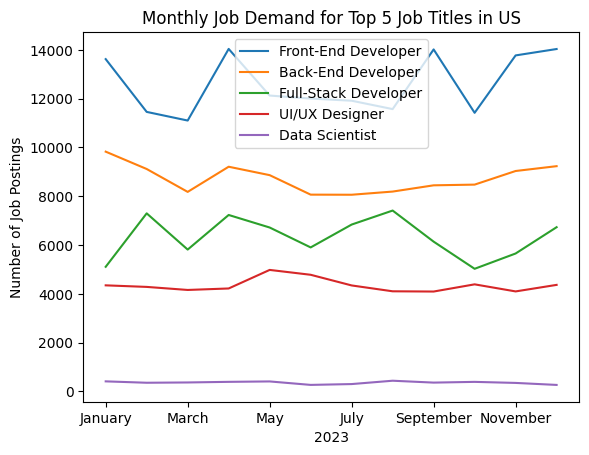

In [10]:
df_us_merged[top_5].plot(kind='line')
plt.title('Monthly Job Demand for Top 5 Job Titles in US')
plt.xlabel('2023')
plt.ylabel('Number of Job Postings')
plt.legend()
plt.show()